In [169]:
import requests
import json
import prettytable
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spacy
import datetime
from spacytextblob.spacytextblob import SpacyTextBlob

In [170]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob');

# 1. Import data

In [171]:
data_path = r"C:\Users\nsbea\OneDrive\4_coding\price\data"
os.chdir(data_path)

In [172]:
df = pd.read_json('News_Category_Dataset_v3.json', lines=True)
df = df[['date','headline','short_description','category']]
df.head()

,date,headline,short_description,category
0,2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS
1,2022-09-23,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS
2,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY
3,2022-09-23,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING
4,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS


In [173]:
df_cat = pd.DataFrame(df['category'].value_counts()).reset_index()
df_cat.head()

,index,category
0,POLITICS,35602
1,WELLNESS,17945
2,ENTERTAINMENT,17362
3,TRAVEL,9900
4,STYLE & BEAUTY,9814


[Text(0.5, 1.0, 'Category')]

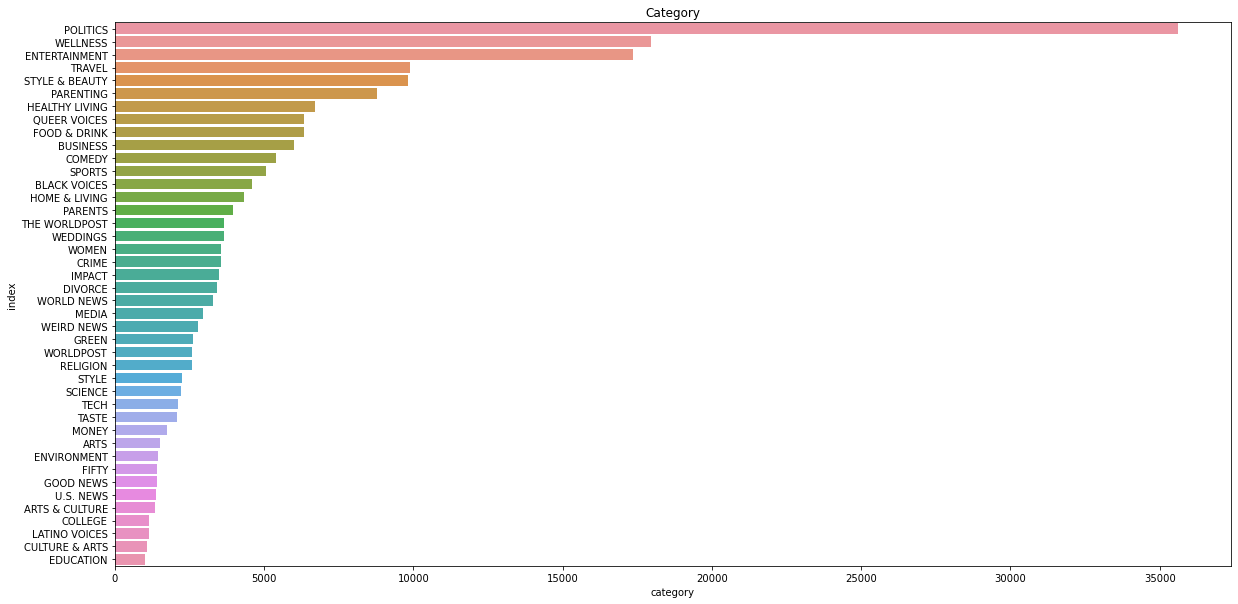

In [174]:
# plot the figure
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df_cat, x='category',y='index').set(title='Category')

Politics is the most often category.

In [175]:
# define price
price_up = ['raise', 'increase', 'up', 'rise', 'inflation','inflate']
price_down = ['lower', 'decrease', 'down', 'deflation','deflate']
price_unchange = ['unchanged', 'same']

In [176]:
def said_about_price(t):
    text = t.text
    result = 0
    if text in price_up:
        result += 1
    elif text in price_down:
        result -= 1
    return result

def get_price(doc):
    l = [said_about_price(t) for t in doc]
    Sum =sum(l)
    return Sum

def get_pol(doc):
    pol = doc._.blob.polarity
    return pol

def get_sub(doc):
    sub = doc._.blob.subjectivity
    return sub
    
def parse(df):
    df['headline'] = df['headline'].apply(lambda x: nlp(x))
    df['short_description'] = df['short_description'].apply(lambda x: nlp(x))
    df['price'] = df['short_description'].apply(get_price) + df['headline'].apply(get_price)
    # sentiment analysis
    df['pol'] = df['short_description'].apply(get_pol)
    df['sub'] = df['short_description'].apply(get_sub)
    df['year_month'] = df['date'].dt.strftime('%Y-%m')
    df = df.sort_values(by=['year_month'])
    return df

In [190]:
# random sampling
test = df.sample(10000).reset_index(drop=True)

In [191]:
test = parse(test)

In [192]:
a = test.groupby('year_month').mean().reset_index()

In [193]:
a

,year_month,price,pol,sub
0,2012-01,0.111111,0.170975,0.419900
1,2012-02,0.040323,0.126539,0.406427
2,2012-03,0.022388,0.115024,0.418337
3,2012-04,0.031250,0.113004,0.402067
4,2012-05,0.064748,0.161343,0.453669
...,...,...,...,...
124,2022-05,0.000000,0.262177,0.482570
125,2022-06,0.000000,0.027500,0.310000
126,2022-07,0.000000,0.094949,0.242713
127,2022-08,0.000000,0.070948,0.297016


<AxesSubplot:xlabel='year_month', ylabel='pol'>

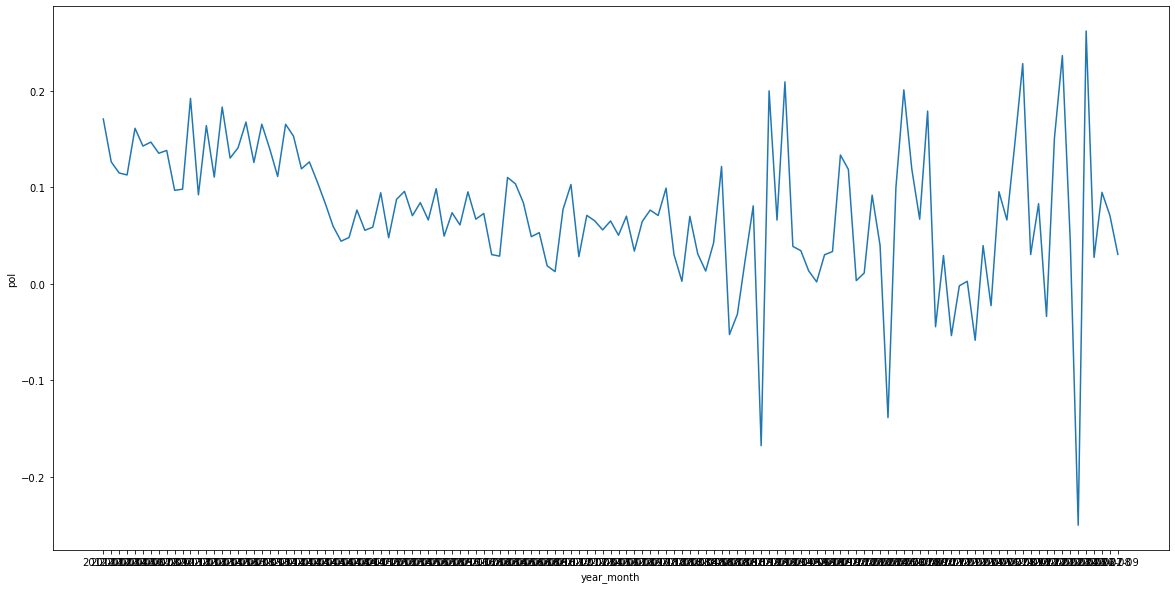

In [198]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=a,y='pol',x='year_month')